In [ ]:
{
  "cells": [],
  "metadata": {},
  "nbformat": 4,
  "nbformat_minor": 4
}


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error
#!pip install keras-tuner --upgrade
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2588\557657729.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


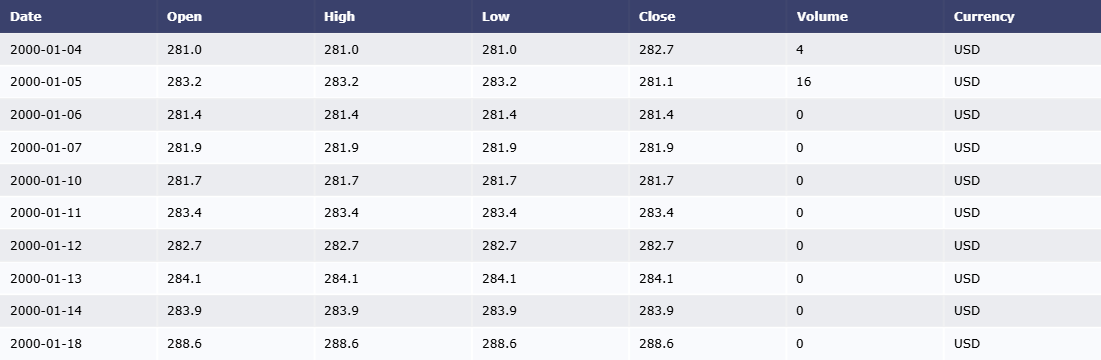

In [2]:
import pandas as pd
df = pd.read_csv("gold.csv")
fig = figfac.create_table(df.head(n = 10))
fig.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5726 non-null   object 
 1   Open      5726 non-null   float64
 2   High      5726 non-null   float64
 3   Low       5726 non-null   float64
 4   Close     5726 non-null   float64
 5   Volume    5726 non-null   int64  
 6   Currency  5726 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 313.3+ KB


In [4]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

In [ ]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Close" : "close", "Volume" : "volume", "Currency" : "currency"}, inplace = True)

print(colored("Column names were succesfully changed...", color = "green", attrs = ["bold", "dark"]))

Column names were succesfully changed...


In [6]:
print("Shape of the dataset: ", df.shape)
print("Length of the dataset: ", len(df))
print("Maximum closing price of gold during last twenty two years: ", df["close"].max())
print("Minimum closing price of gold during last twenty two years: ", df["close"].min())

Shape of the dataset:  (5726, 7)
Length of the dataset:  5726
Maximum closing price of gold during last twenty two years:  2054.6
Minimum closing price of gold during last twenty two years:  255.1


In [7]:
# Loại bỏ cột 'currency' và 'Date_numeric'
df_numeric = df.drop(columns=['currency'])
# Chỉ lấy các cột số
df_numeric = df_numeric.select_dtypes(include=[float, int])
# Tính toán ma trận tương quan
corr = df_numeric.corr()
# Hiển thị ma trận tương quan với màu nền
corr.style.background_gradient(cmap="copper")


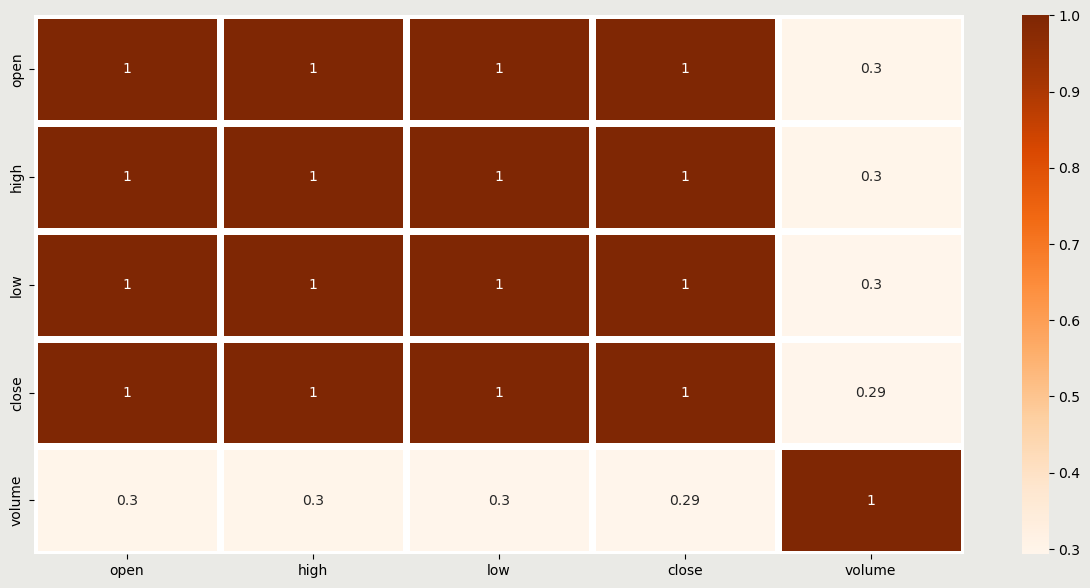

In [8]:
plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
sns.heatmap(df_numeric.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

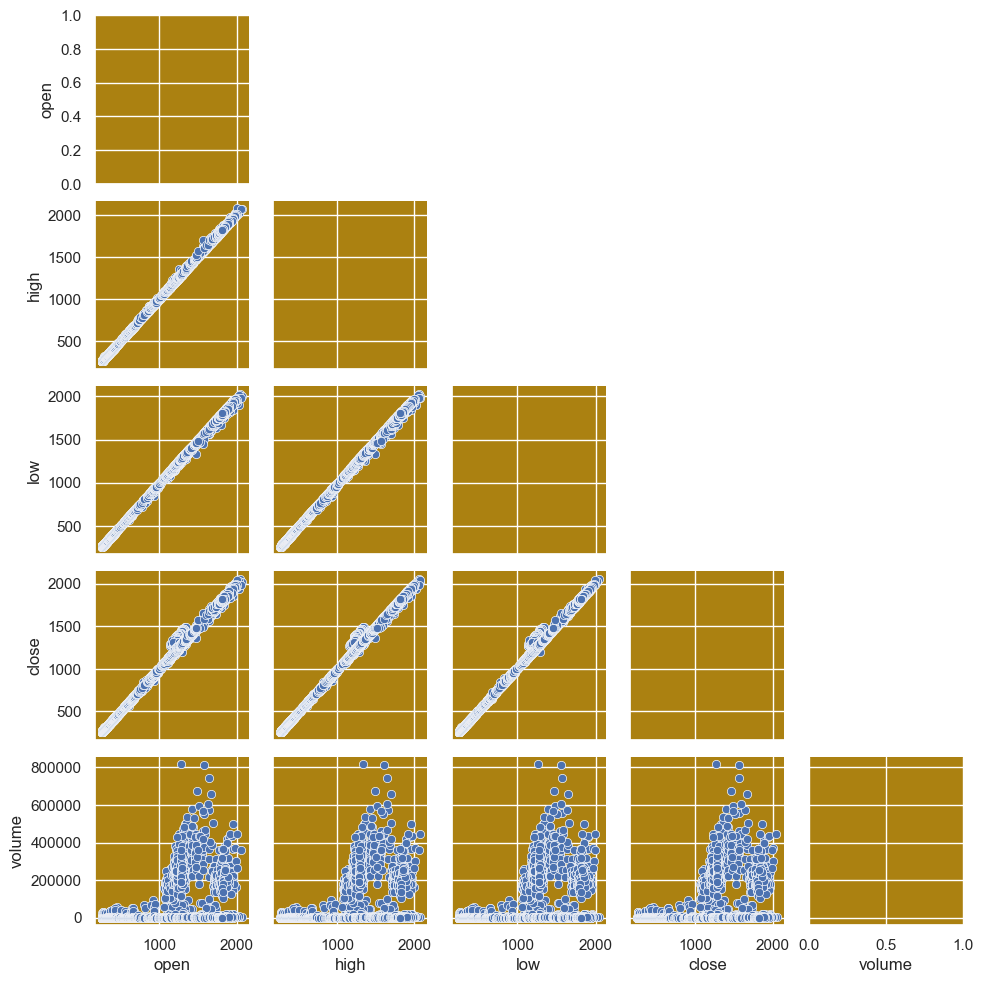

In [9]:
sns.set(rc={"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})
sns.pairplot(df, diag_kind = "reg", height = 2, aspect = 1, corner = True);

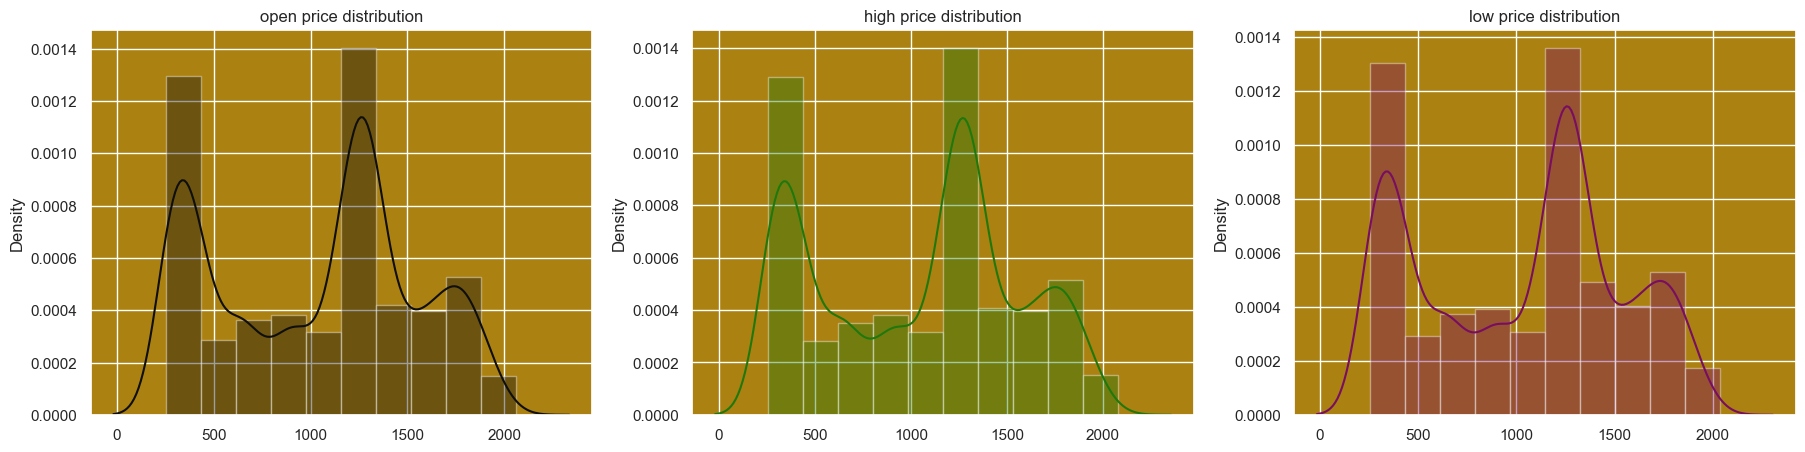

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df["open"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df["high"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df["low"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");

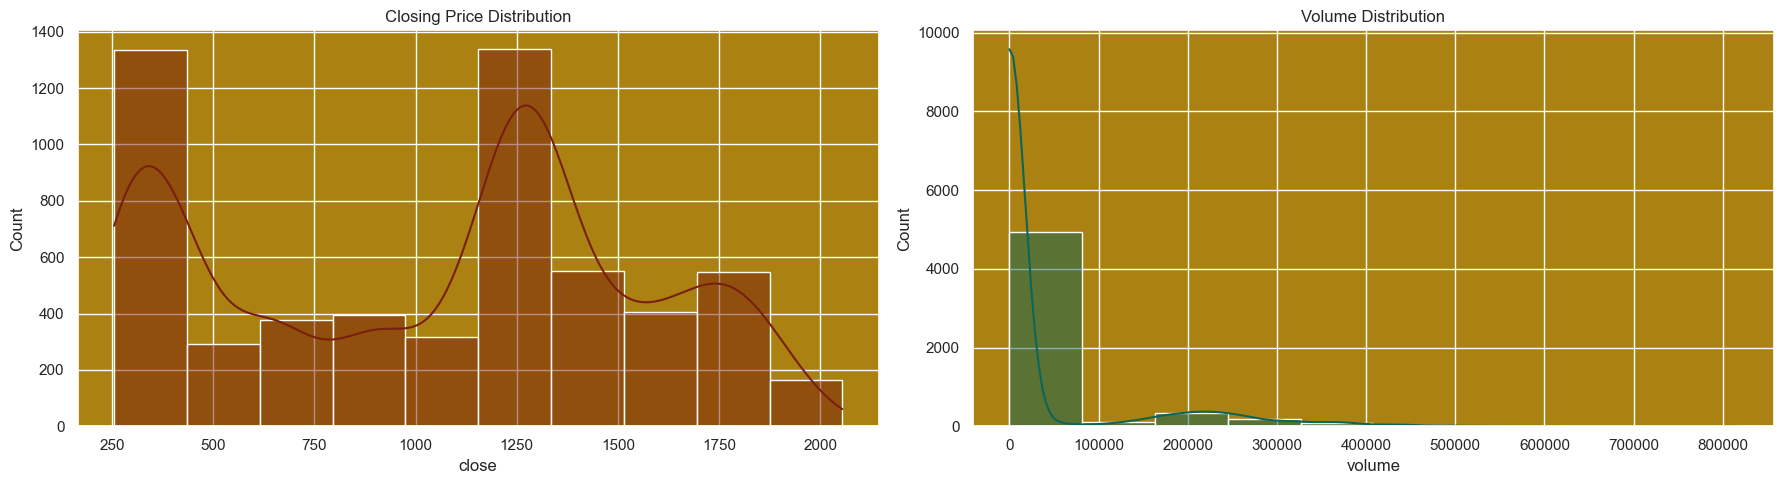

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

# Sử dụng histplot thay vì distplot
sns.histplot(ax = axes[0], x = df["close"], bins = 10, kde = True, color = "#781F0D")
axes[0].set_title("Closing Price Distribution")

sns.histplot(ax = axes[1], x = df["volume"], bins = 10, kde = True, color = "#0D6559")
axes[1].set_title("Volume Distribution")

plt.tight_layout()
plt.show()


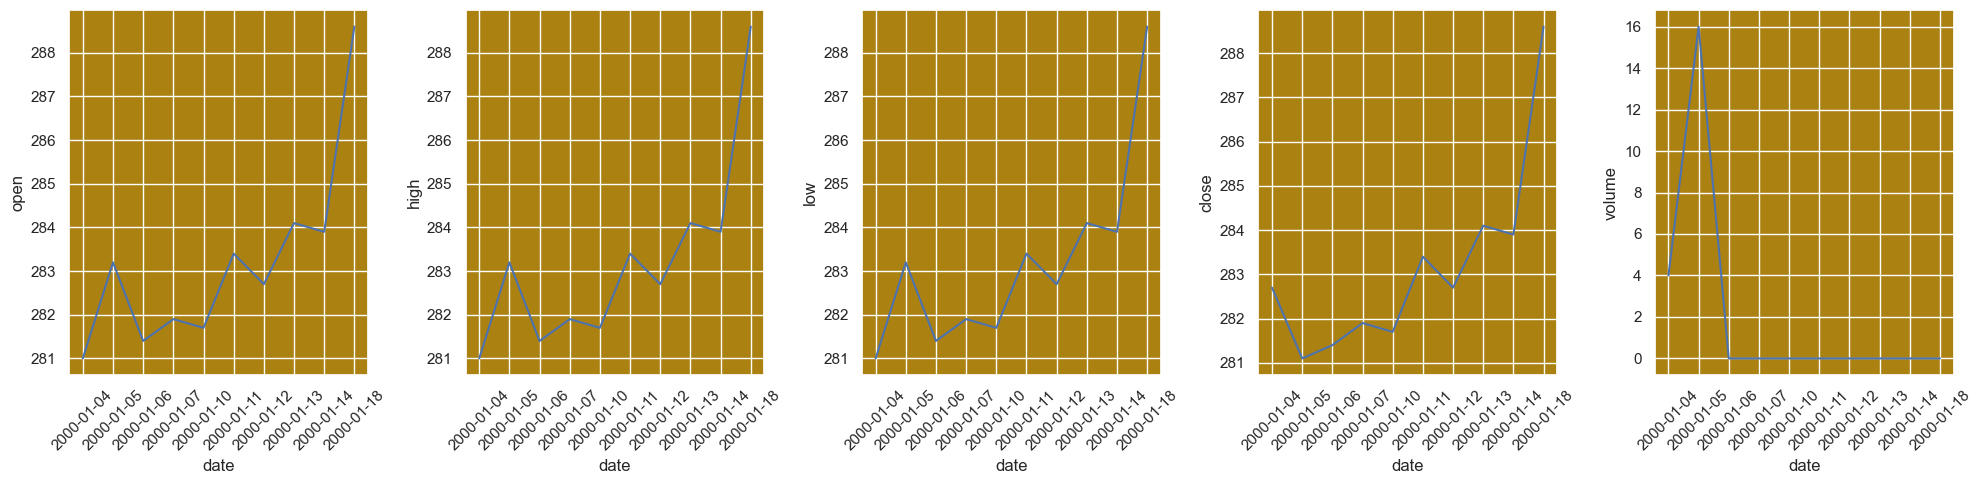

In [12]:
sns.set(rc = {"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})
sample_size = 10  # Hiển thị 10 dòng đầu tiên
df_sample = df.head(sample_size)

fig, axes = plt.subplots(1, 5, figsize = (20, 5))
axes = axes.flatten()

# Sử dụng df_sample để vẽ các biểu đồ
sns.lineplot(ax = axes[0], x = df_sample["date"], y = df_sample["open"])
sns.lineplot(ax = axes[1], x = df_sample["date"], y = df_sample["high"])
sns.lineplot(ax = axes[2], x = df_sample["date"], y = df_sample["low"])
sns.lineplot(ax = axes[3], x = df_sample["date"], y = df_sample["close"])
sns.lineplot(ax = axes[4], x = df_sample["date"], y = df_sample["volume"])

for ax in axes:
    ax.set_xticks(ax.get_xticks()[::len(df_sample)//10])  # Hiển thị chỉ 10 ticks
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


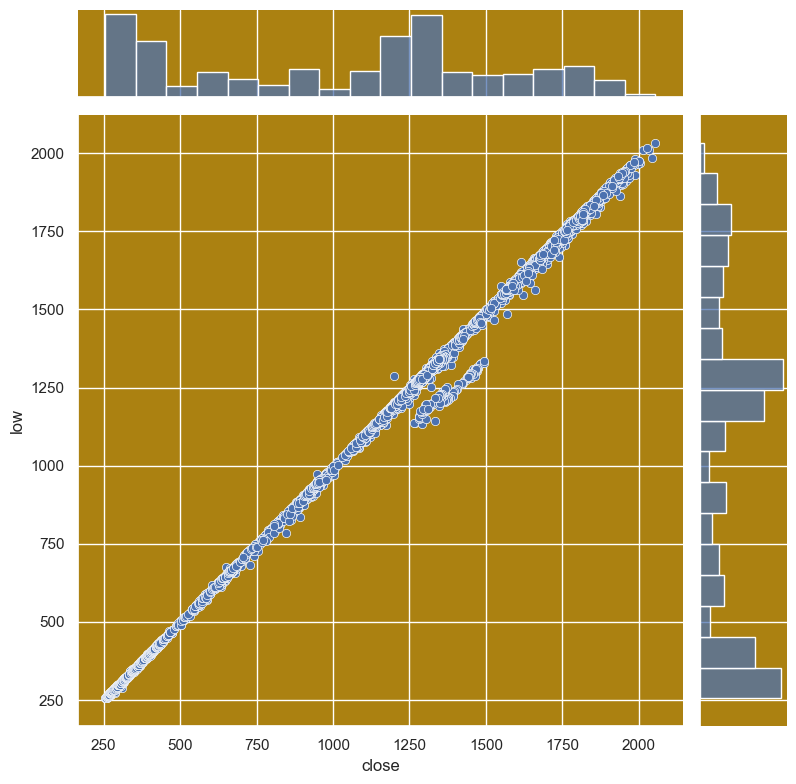

In [13]:
sns.jointplot(x = "close", y = "low", data = df, height = 8, ratio = 6, kind = "scatter");

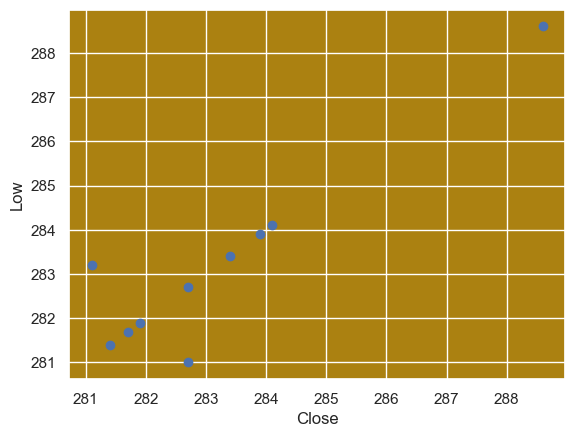

In [14]:
plt.scatter(df_sample["close"], df_sample["low"])
plt.xlabel("Close")
plt.ylabel("Low")
plt.show()


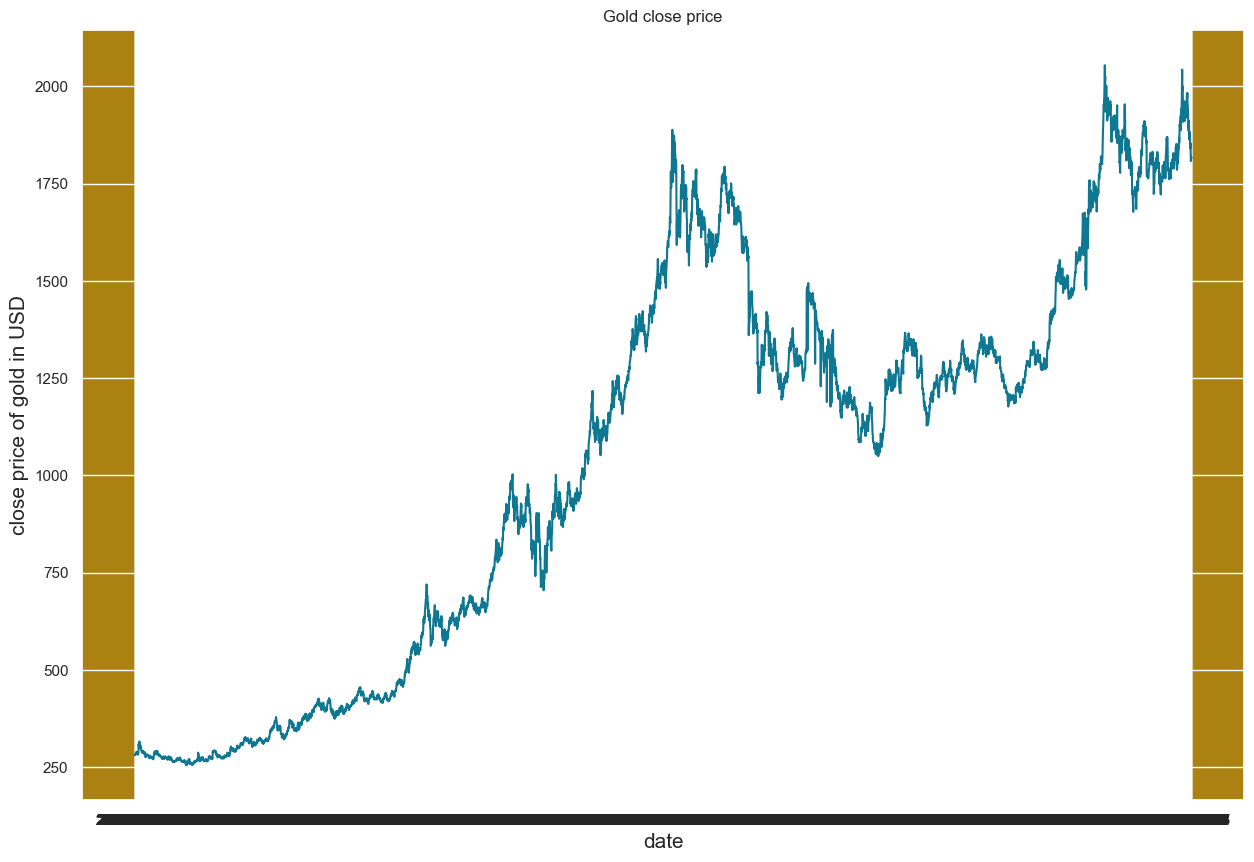

In [15]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["close"], color = "#0E7791")
plt.title("Gold close price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("close price of gold in USD", fontsize = 15)
plt.show()

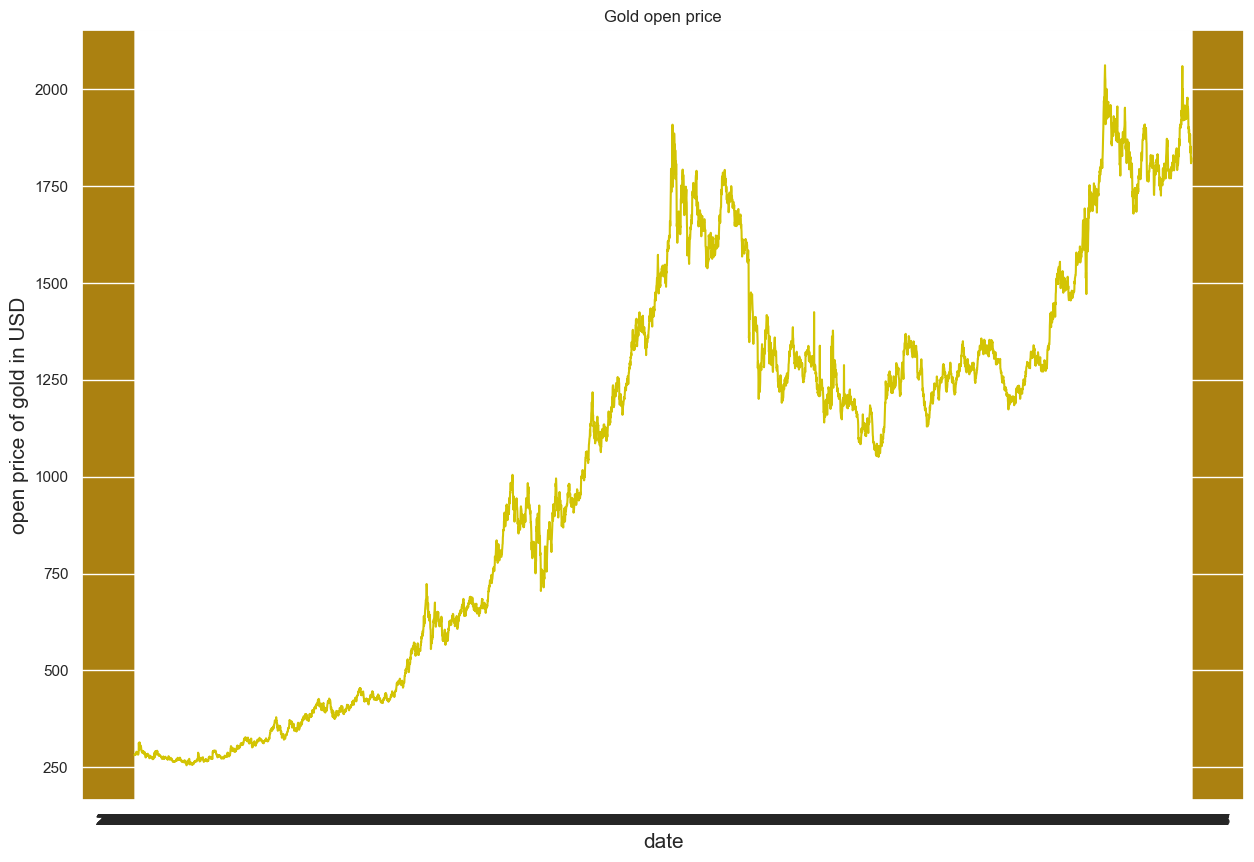

In [16]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["open"], color = "#D3C404")
plt.title("Gold open price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("open price of gold in USD", fontsize = 15)
plt.show()

In [17]:
fig = px.histogram(df, x = "close", y = "volume", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df.columns)
fig.show()

In [18]:
data = df.filter(['close'])
data.head().style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                    "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

In [19]:
dataset = data.values
dataset[0:5]

array([[282.7],
       [281.1],
       [281.4],
       [281.9],
       [281.7]])

## RNN

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

array([[0.01533759],
       [0.01444846],
       [0.01461517],
       ...,
       [0.86629619],
       [0.86901917],
       [0.86767991]])

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Kết quả cho tỷ lệ 70/30:
RMSE: 43.26
MAE: 35.46
MAPE: 2.24%



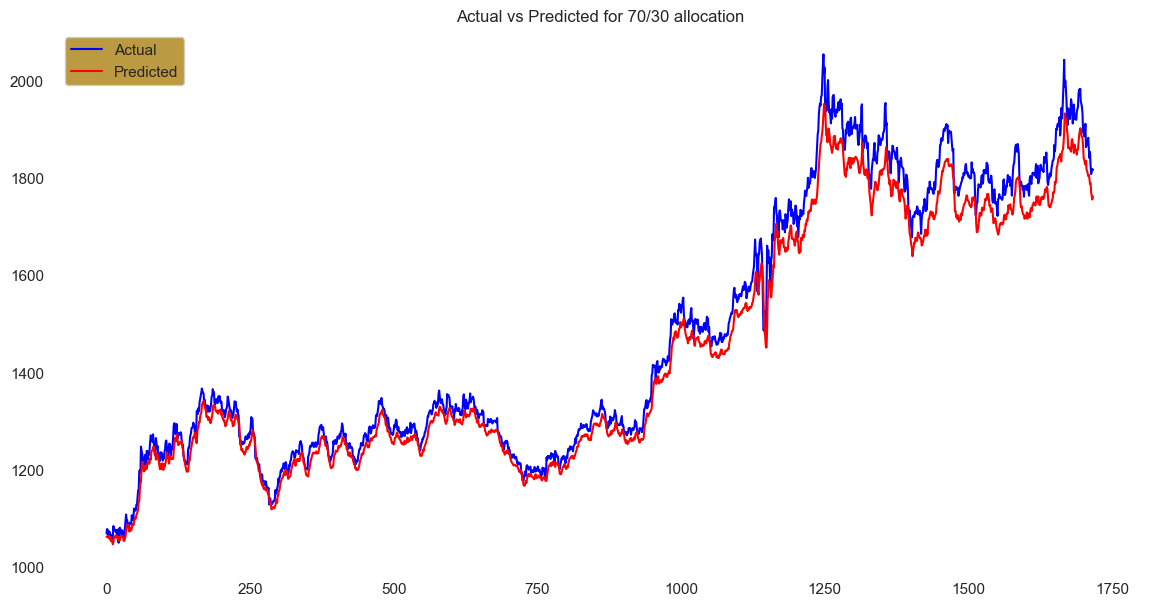

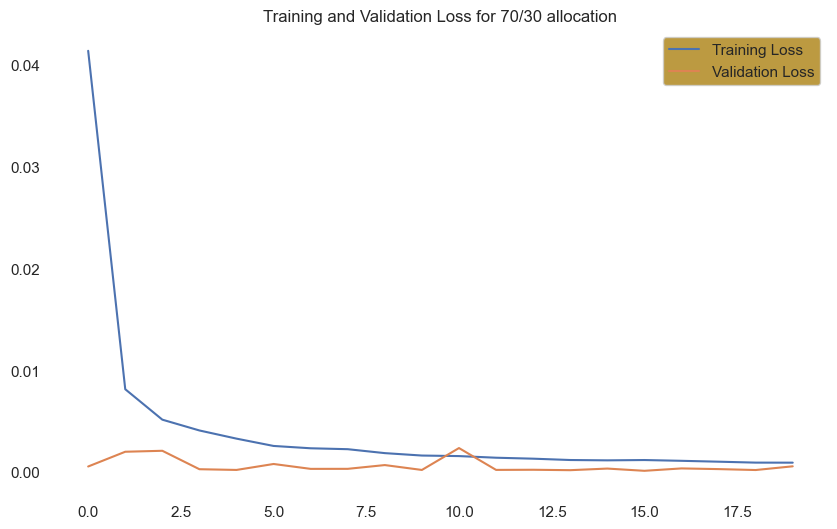

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Kết quả cho tỷ lệ 75/25:
RMSE: 37.80
MAE: 31.49
MAPE: 1.95%



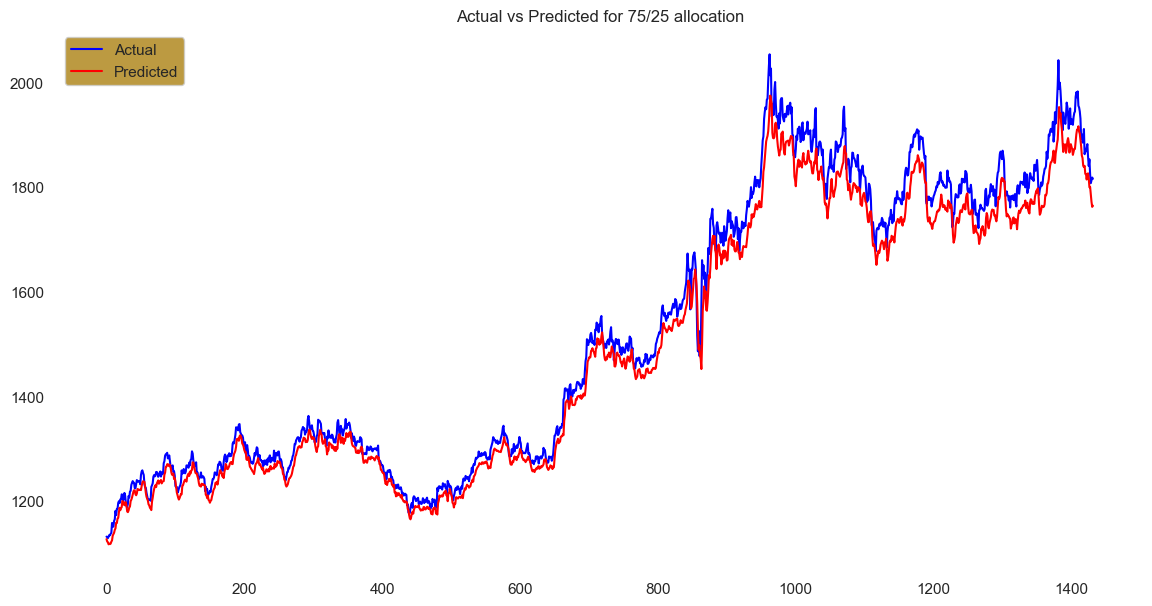

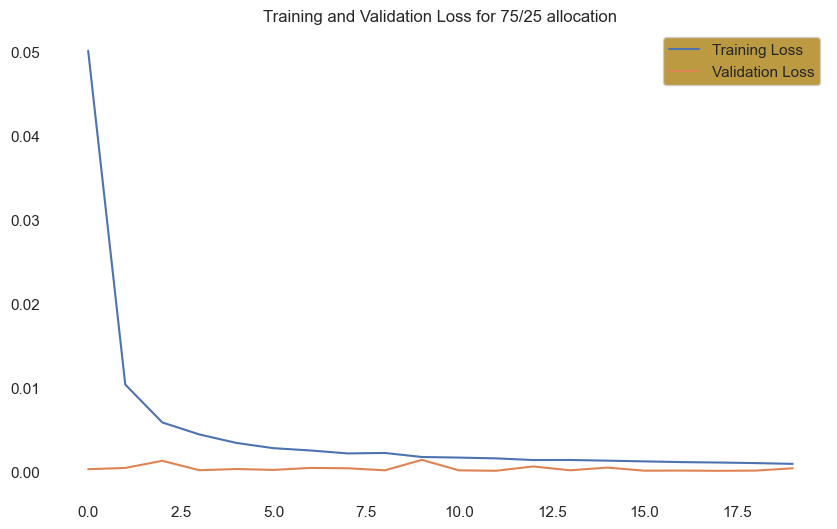

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Kết quả cho tỷ lệ 80/20:
RMSE: 20.67
MAE: 15.83
MAPE: 1.02%



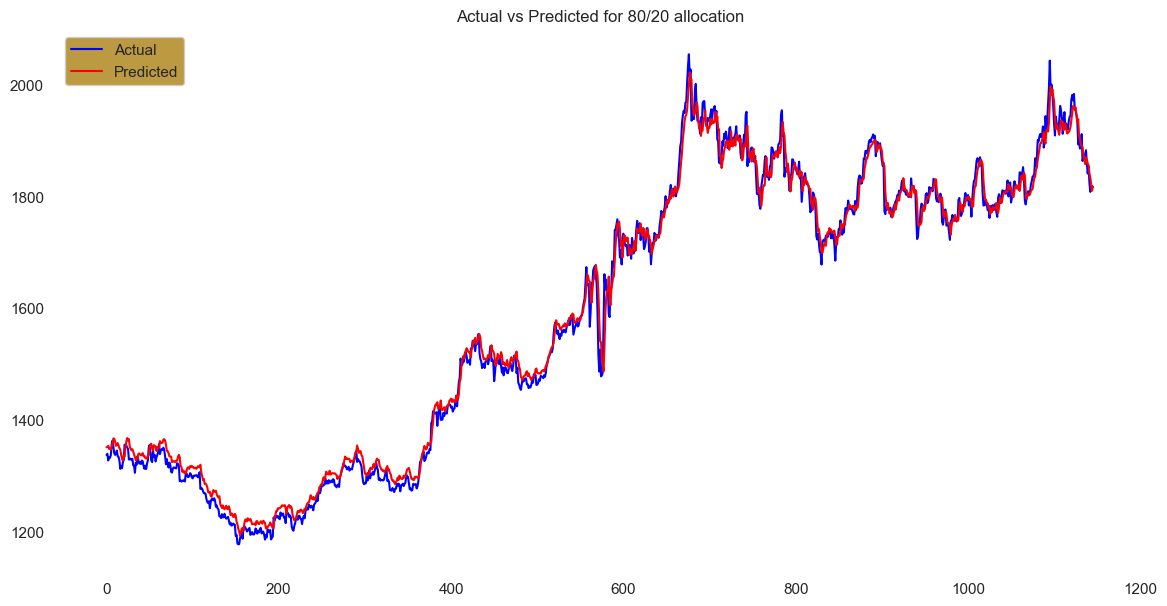

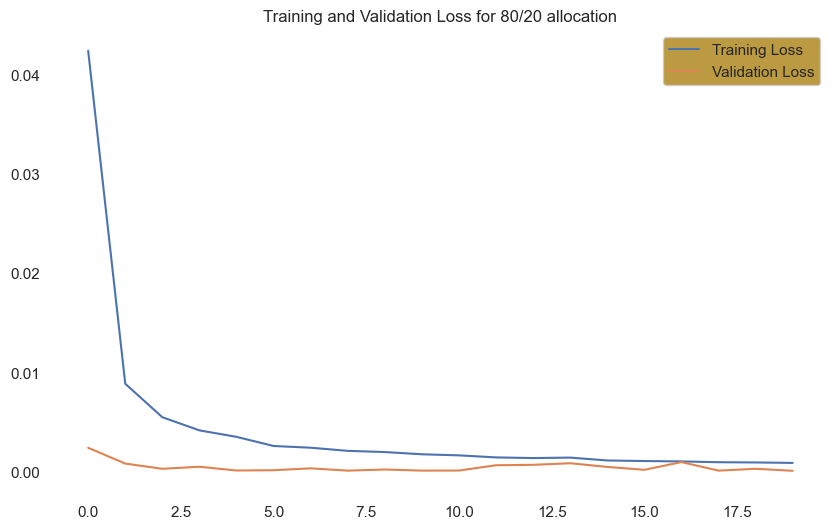

In [21]:
from keras.layers import SimpleRNN, Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Định nghĩa các tỷ lệ chia dữ liệu
ratios = [0.7, 0.75, 0.8]
lookback = 60  # Số bước thời gian đầu vào

# Hàm tạo sequences cho RNN
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback, 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)
# Lặp qua các tỷ lệ chia dữ liệu
for ratio in ratios:
    # Tính toán kích thước tập huấn luyện
    training_data_len = int(len(dataset) * ratio)
    
    # Chia dữ liệu theo tỷ lệ
    train_data = scaled_data[:training_data_len]
    test_data = scaled_data[training_data_len - lookback:]  # Lấy thêm `lookback` dữ liệu cho dự đoán

    # Tạo sequences cho huấn luyện và kiểm tra
    X_train, y_train = create_sequences(train_data, lookback)
    X_test, y_test = create_sequences(test_data, lookback)
    
    # Định hình lại dữ liệu
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    # Khởi tạo và huấn luyện mô hình RNN
    model = Sequential()
    model.add(SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(lookback, 1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Dự đoán trên tập kiểm tra
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Tính toán các chỉ số đánh giá
    rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
    mae = mean_absolute_error(y_test_original, predictions)
    mape = np.mean(np.abs((y_test_original - predictions) / y_test_original)) * 100

    print(f"Kết quả cho tỷ lệ {int(ratio*100)}/{round((1-ratio)*100)}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%\n")
    
    # Biểu đồ Actual vs Predicted
    plt.figure(figsize=(14, 7))
    plt.gca().set_facecolor('white') 
    plt.plot(y_test_original.flatten(), label='Actual', color='blue')
    plt.plot(predictions.flatten(), label='Predicted', color='red')
    plt.title(f'Actual vs Predicted for {int(ratio*100)}/{round((1-ratio)*100)} allocation')
    plt.legend()
    plt.show()

    # Biểu đồ Loss trong quá trình huấn luyện
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('white')  # Đặt nền trắng cho biểu đồ
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Training and Validation Loss for {int(ratio*100)}/{round((1.0-ratio)*100)} allocation")
    plt.legend()
    plt.show()

## LSTM

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Results for 70/30 allocation:
MAPE: 1.6222626108947849
MAE: 24.915004594917487
RMSE: 31.892553553358788




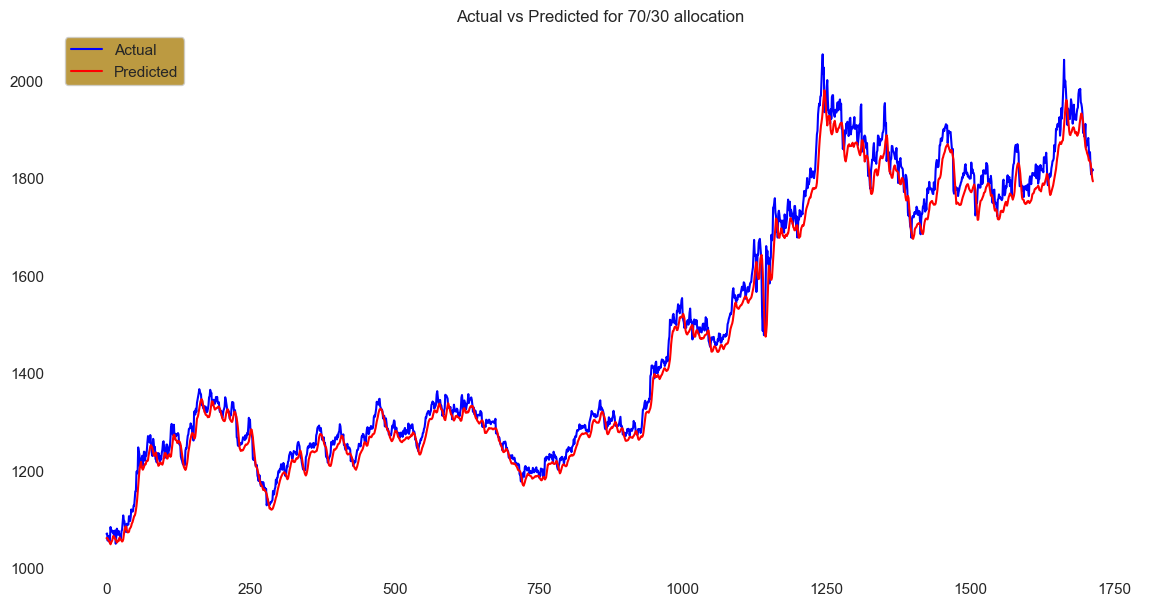

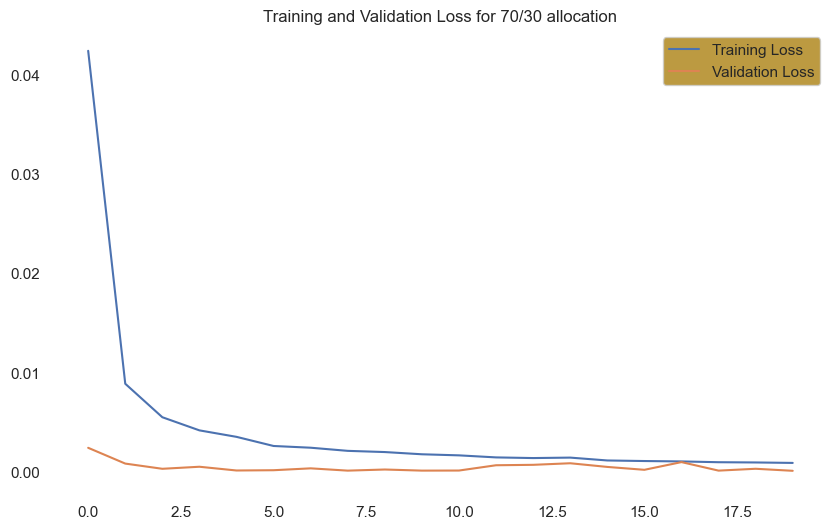

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results for 75/25 allocation:
MAPE: 1.6327484360241094
MAE: 25.939532091746173
RMSE: 32.99172254409982




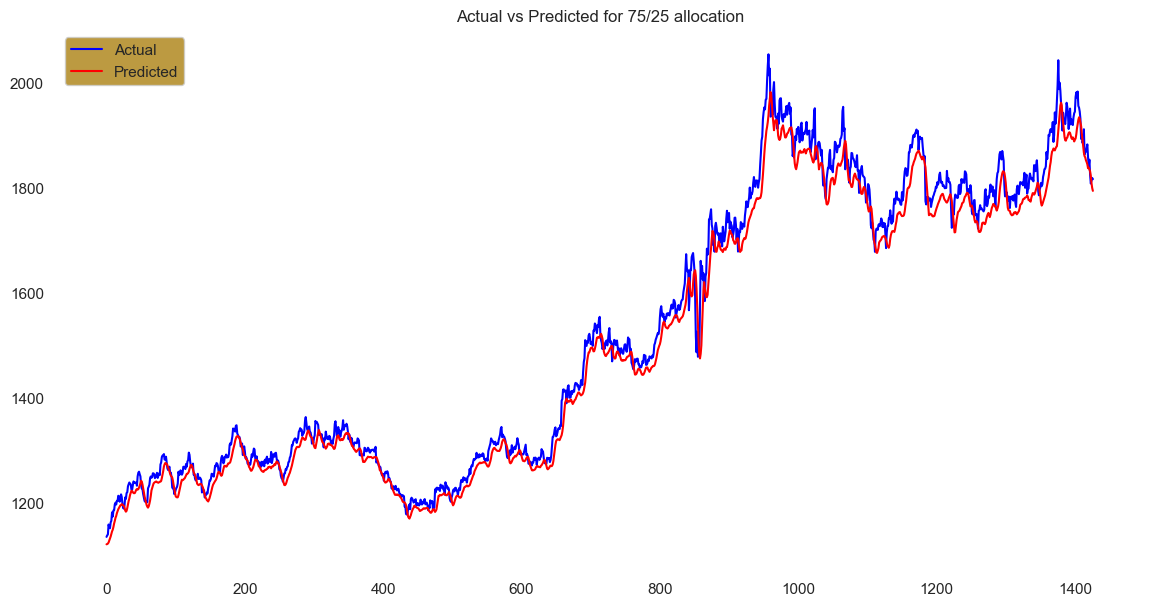

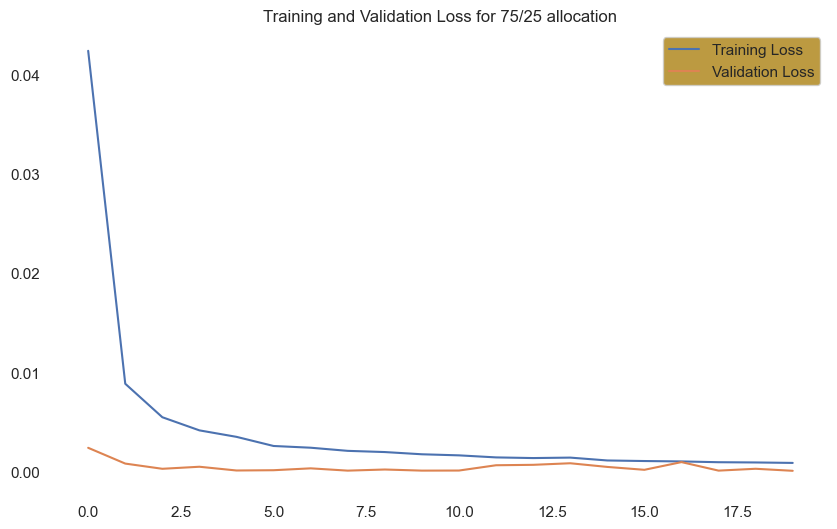

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results for 80/20 allocation:
MAPE: 1.1501482902597688
MAE: 19.05182246162218
RMSE: 26.554943604853925




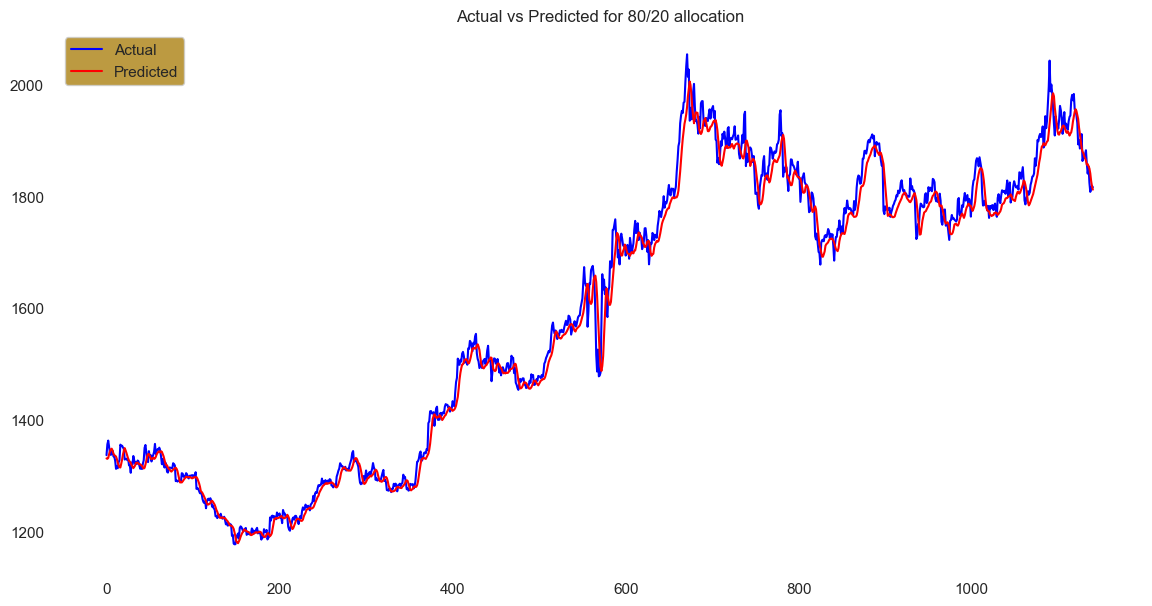

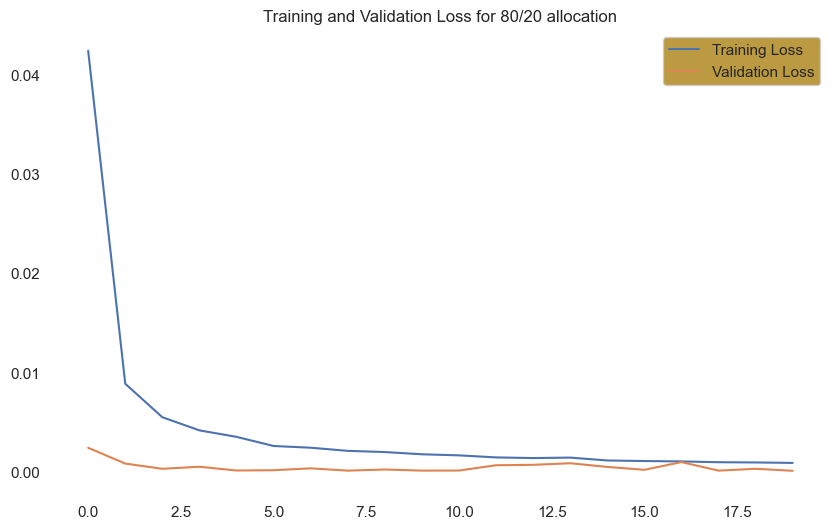

In [22]:
# Function to split the dataset into training and testing sets based on a given ratio
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def split_data(data, ratio):
    train_size = int(len(data) * ratio)
    train, test = data[:train_size], data[train_size:]
    return train, test

# Function to create sequences for LSTM input
def create_sequences(data, window):
    sequences = []
    labels = []
    for i in range(len(data) - window):
        sequences.append(data[i:i + window])
        labels.append(data[i + window])
    return np.array(sequences), np.array(labels)

# Function to build and train LSTM model
def build_and_train_lstm(train_sequences, train_labels, window):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(window, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(train_sequences, train_labels, epochs=20, batch_size=32, verbose=0)
    return model

# Function to calculate and print MAPE, MAE, and RMSE
def calculate_metrics(true_values, predictions):
    mape = mean_absolute_percentage_error(true_values, predictions)*100
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    return mape, mae, rmse

# Define the allocation ratios
ratios = [0.7, 0.75, 0.8]

# Define the window size for LSTM
window = 5

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.close.values.reshape(-1, 1))

# Iterate over each ratio and calculate metrics
for ratio in ratios:
    train_data, test_data = split_data(scaled_data, ratio)
    
    # Create sequences for training and testing
    train_sequences, train_labels = create_sequences(train_data, window)
    test_sequences, test_labels = create_sequences(test_data, window)
    
    # Reshape sequences for LSTM input
    train_sequences = train_sequences.reshape((train_sequences.shape[0], train_sequences.shape[1], 1))
    test_sequences = test_sequences.reshape((test_sequences.shape[0], test_sequences.shape[1], 1))
    
    # Build and train LSTM model
    lstm_model = build_and_train_lstm(train_sequences, train_labels, window)
    
    # Make predictions on the test set
    predictions = lstm_model.predict(test_sequences)
    
    # Inverse transform predictions and true values to original scale
    predictions = scaler.inverse_transform(predictions)
    true_values = scaler.inverse_transform(test_labels.reshape(-1, 1))
    
    # Calculate metrics
    mape, mae, rmse = calculate_metrics(true_values, predictions)
    
    print(f"Results for {int(ratio*100)}/{round((1-ratio)*100)} allocation:")
    print(f"MAPE: {mape}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print("\n")
    
    # Biểu đồ Actual vs Predicted
    plt.figure(figsize=(14, 7))
    plt.gca().set_facecolor('white') 
    plt.plot(true_values.flatten(), label='Actual', color='blue')
    plt.plot(predictions.flatten(), label='Predicted', color='red')
    plt.title(f'Actual vs Predicted for {int(ratio*100)}/{round((1-ratio)*100)} allocation')
    plt.legend()
    plt.show()
    
    # Biểu đồ Loss trong quá trình huấn luyện
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('white')  # Đặt nền trắng cho biểu đồ
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Training and Validation Loss for {int(ratio*100)}/{round((1.0-ratio)*100)} allocation")
    plt.legend()
    plt.show()

## So sánh giữa LSTM và RNN

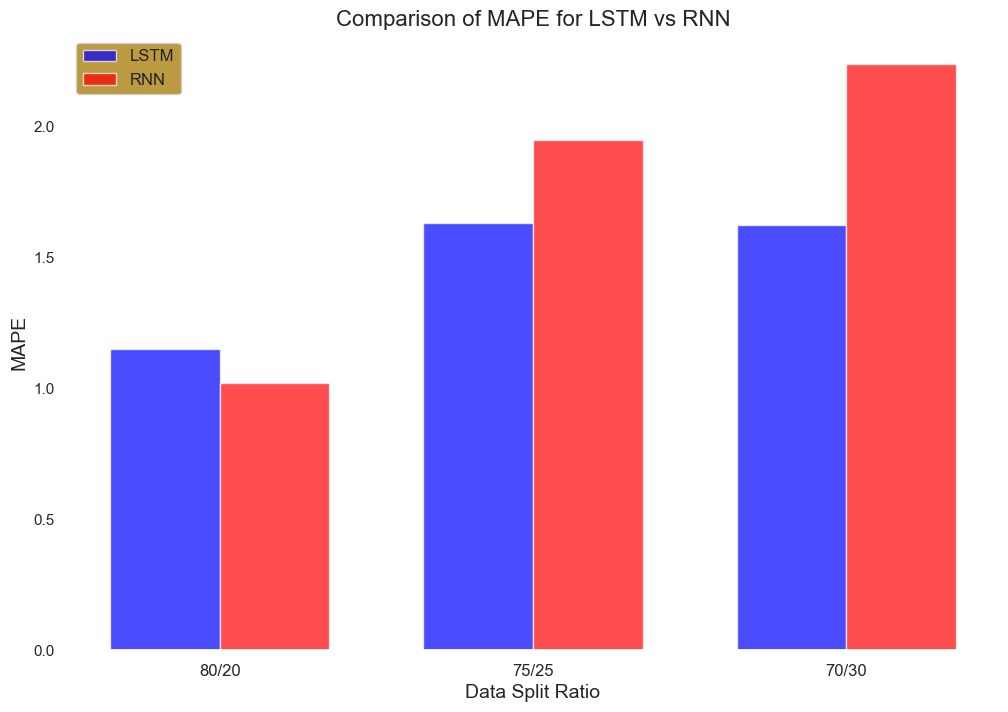

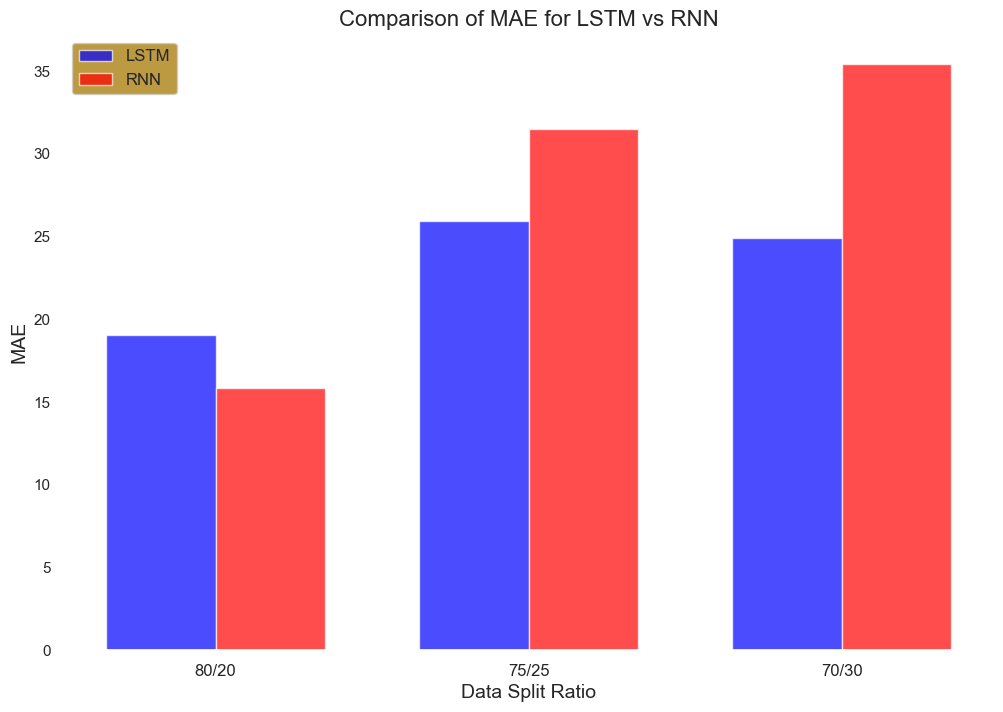

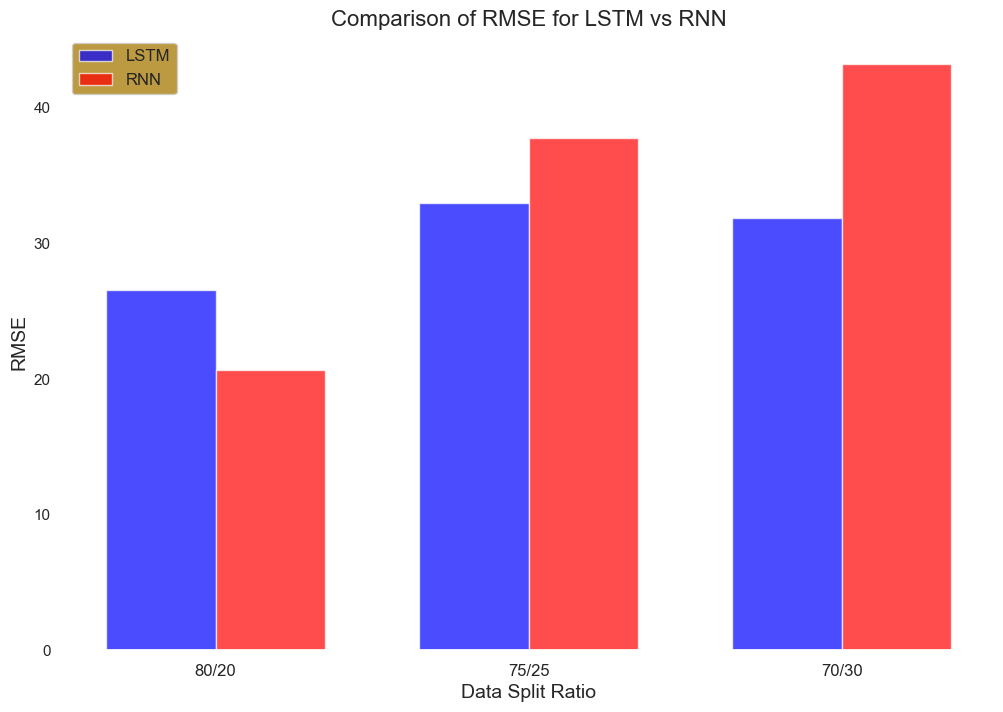

In [31]:

# Data for LSTM and RNN
ratios = ["80/20", "75/25", "70/30"]
lstm_mape = [1.1501, 1.6327, 1.6222]
rnn_mape = [1.02, 1.95, 2.24]

lstm_mae = [19.0518, 25.9395, 24.9150]
rnn_mae = [15.83, 31.49, 35.46]

lstm_rmse = [26.5549, 32.9917, 31.8925]
rnn_rmse = [20.67, 37.80, 43.26]

# Bar width for grouped bar chart
bar_width = 0.35
x = np.arange(len(ratios))  # x locations

# Plot MAPE comparison
plt.figure(figsize=(12, 8), facecolor='white')  # Set background color to white
ax = plt.gca()  # Get current axes
ax.set_facecolor('white')  # Set axes background to white
plt.bar(x - bar_width / 2, lstm_mape, bar_width, label='LSTM', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, rnn_mape, bar_width, label='RNN', color='red', alpha=0.7)
plt.title("Comparison of MAPE for LSTM vs RNN", fontsize=16)
plt.xlabel("Data Split Ratio", fontsize=14)
plt.ylabel("MAPE", fontsize=14)
plt.xticks(x, ratios, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(12, 8), facecolor='white')  # Set background color to white
ax = plt.gca()  # Get current axes
ax.set_facecolor('white')  # Set axes background to white
plt.bar(x - bar_width / 2, lstm_mae, bar_width, label='LSTM', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, rnn_mae, bar_width, label='RNN', color='red', alpha=0.7)
plt.title("Comparison of MAE for LSTM vs RNN", fontsize=16)
plt.xlabel("Data Split Ratio", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.xticks(x, ratios, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(12, 8), facecolor='white')  # Set background color to white
ax = plt.gca()  # Get current axes
ax.set_facecolor('white')  # Set axes background to white
plt.bar(x - bar_width / 2, lstm_rmse, bar_width, label='LSTM', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, rnn_rmse, bar_width, label='RNN', color='red', alpha=0.7)
plt.title("Comparison of RMSE for LSTM vs RNN", fontsize=16)
plt.xlabel("Data Split Ratio", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xticks(x, ratios, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 1. Tính thích hợp của LSTM và RNN đối với dataset này:
#### LSTM:
##### Với hiệu suất vượt trội hơn về MAPE, MAE và RMSE, đặc biệt khi giảm dữ liệu huấn luyện, LSTM là lựa chọn phù hợp hơn cho dataset này. Điều này có thể là do LSTM có khả năng lưu giữ thông tin dài hạn, giúp xử lý tốt hơn các quan hệ phức tạp trong dữ liệu thời gian.
#### RNN:
##### RNN hoạt động tương đối tốt ở tỷ lệ 80/20, nhưng sự giảm hiệu suất đáng kể ở các tỷ lệ khác cho thấy nó không phù hợp cho dataset này khi dữ liệu huấn luyện hạn chế. RNN có thể bị ảnh hưởng bởi vấn đề vanishing gradient, khiến nó khó học các mẫu dài hạn trong dữ liệu.
## 2. Kết luận:
#### LSTM phù hợp hơn RNN cho dataset này do khả năng xử lý tốt hơn ở các tỷ lệ dữ liệu khác nhau và mức độ sai số thấp hơn trên tất cả các chỉ số. Nếu dataset chứa các chuỗi dài hạn hoặc mối quan hệ phức tạp, LSTM sẽ là lựa chọn tối ưu hơn.
